In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline 

C:\Users\ymk13\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape


(55000, 784)

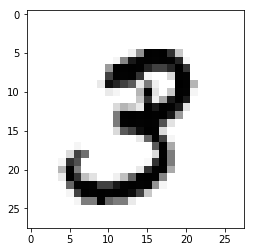

In [4]:
plt.imshow(mnist.train.images[1].reshape(28,28), cmap='Greys')

In [11]:
learning_rate = 0.001
number_epochs = 30
batch_size = 100
n_classes = 10
n_samples = mnist.train.num_examples
n_input = 784
n_hidden_layer_1 = 400
n_hidden_layer_2 = 400 
n_hidden_layer_3 = 400

In [12]:
def multilayer_perceptron(x, weight, biases):
    layer_1 = tf.add(tf.matmul(x,weights['w1']), biases['b1']) ## F= f(xW+B)
    layer_1 = tf.nn.relu(layer_1) ##relu(x) = max(0,x)
    layer_2 = tf.add(tf.matmul(layer_1,weights['w2']), biases['b2']) 
    layer_2 = tf.nn.relu(layer_2) 
    layer_3 = tf.add(tf.matmul(layer_2,weights['w3']), biases['b3']) 
    layer_3 = tf.nn.relu(layer_3) 
    layer_out = tf.add(tf.matmul(layer_3,weights['out']), biases['out']) 
    
    return layer_out

weights = {'w1':tf.Variable(tf.random_normal([n_input,n_hidden_layer_1])),
           'w2':tf.Variable(tf.random_normal([n_hidden_layer_1,n_hidden_layer_2])),
           'w3':tf.Variable(tf.random_normal([n_hidden_layer_2,n_hidden_layer_3])),
           'out':tf.Variable(tf.random_normal([n_hidden_layer_3,n_classes]))
          }

biases  = {'b1':tf.Variable(tf.random_normal([n_hidden_layer_1])),
           'b2':tf.Variable(tf.random_normal([n_hidden_layer_2])),
           'b3':tf.Variable(tf.random_normal([n_hidden_layer_3])),
           'out':tf.Variable(tf.random_normal([n_classes]))
          }

x = tf.placeholder('float', [None,n_input])
y = tf.placeholder('float', [None,n_classes])

In [13]:
predictions = multilayer_perceptron(x,weights,biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=predictions))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [14]:
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
sess.run(init)

C:\Users\ymk13\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [15]:
for epoch in range(number_epochs):
    average_cost = 0.0
    number_batch = int(n_samples/batch_size)
    for i in range(number_batch):
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x, y:batch_y})
        average_cost = average_cost + c / number_batch
    print("Epoch:{} cost{:.4f}".format(epoch+1,average_cost))
print("Model has completed {} Epochs of training".format(number_epochs))

Epoch:1 cost2602.3858
Epoch:2 cost614.3627
Epoch:3 cost344.5382
Epoch:4 cost214.3838
Epoch:5 cost133.4527
Epoch:6 cost91.4200
Epoch:7 cost58.3353
Epoch:8 cost43.7084
Epoch:9 cost31.3545
Epoch:10 cost22.9525
Epoch:11 cost23.3436
Epoch:12 cost19.9309
Epoch:13 cost17.9276
Epoch:14 cost14.8961
Epoch:15 cost15.6889
Epoch:16 cost16.9653
Epoch:17 cost14.7666
Epoch:18 cost13.0258
Epoch:19 cost14.7334
Epoch:20 cost12.0816
Epoch:21 cost8.7667
Epoch:22 cost9.3940
Epoch:23 cost11.0889
Epoch:24 cost11.0567
Epoch:25 cost8.9841
Epoch:26 cost7.0539
Epoch:27 cost8.8328
Epoch:28 cost8.0773
Epoch:29 cost9.9778
Epoch:30 cost8.2193
Model has completed 30 Epochs of training


In [16]:
correct_predictions = tf.equal(tf.argmax(predictions,1), tf.argmax(y,1) )
correct_predictions = tf.cast(correct_predictions, 'float') ##from boolen to float
accuracy = tf.reduce_mean(correct_predictions)##??
accuracy.eval({x:mnist.test.images, y:mnist.test.labels})

0.9644